# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset:

In [2]:
data=pd.read_csv('/content/Summer-Olympic-medals-1976-to-2008.csv', encoding='latin1')

In [3]:
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


# EDA:

In [4]:
df=data.copy()

In [5]:
# Cheking for datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

,0
City,117
Year,117
Sport,117
Discipline,117
Event,117
Athlete,117
Gender,117
Country_Code,117
Country,117
Event_gender,117


In [7]:
# Checking for null values:
nulls=df.isnull().sum().sum()
nulls

np.int64(1287)

In [8]:
# % of null values:
print('% nulls:',nulls/df.shape[0])

% nulls: 0.08339272986457591


In [9]:
# Checking for duplicate values:
df.duplicated().sum()

np.int64(117)

In [10]:
# Checking for categorical columns:
for col in df.columns:
  if df[col].dtypes=='object':
    print(df[col].value_counts())
    print('-'*50)

City
Beijing        2042
Sydney         2015
Athens         1998
Atlanta        1859
Barcelona      1705
Seoul          1546
Los Angeles    1459
Moscow         1387
Montreal       1305
Name: count, dtype: int64
--------------------------------------------------
Sport
Aquatics             2210
Athletics            1523
Rowing               1377
Hockey                817
Gymnastics            783
Handball              780
Volleyball            695
Canoe / Kayak         672
Football              669
Basketball            646
Fencing               606
Wrestling             533
Cycling               483
Equestrian            423
Sailing               417
Boxing                416
Judo                  396
Shooting              345
Baseball              335
Weightlifting         311
Softball              180
Archery               162
Badminton             120
Table Tennis          120
Tennis                118
Modern Pentathlon      81
Taekwondo              80
Triathlon              18
Name

In [11]:
# Type error: year.
# Un necessary columns,
# Nulls Present
# Duplicates are present.
# No formatting problem.

# Pre Processing:

In [12]:
# Droping of duplicate values:
df.drop_duplicates(inplace=True)

In [13]:
df.isnull().sum().sum()

np.int64(11)

In [14]:
# Droping of null values:
df.dropna(inplace=True)

In [15]:
df.isnull().sum().sum()

np.int64(0)

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
# Fixing the type of year
df['Year']=df['Year'].astype(int)

In [18]:
# Removing of unnecessary columns:
df.drop(columns=['Athlete','Event_gender','Country_Code'],inplace=True)

In [19]:
df.head()

,City,Year,Sport,Discipline,Event,Gender,Country,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,Women,East Germany,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,Men,Soviet Union,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,Men,United States,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,Men,Italy,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,Women,United States,Bronze


In [20]:
print('df is cleaned for analysis.')

df is cleaned for analysis.


# Analysis:

# 🏅 5. Sport Popularity and Medal Density
Business Problem:

Which sports have the highest number of events and medals, and how does this affect a country’s overall medal tally?


In [21]:
df.head()

,City,Year,Sport,Discipline,Event,Gender,Country,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,Women,East Germany,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,Men,Soviet Union,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,Men,United States,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,Men,Italy,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,Women,United States,Bronze


Sports By Number of Events:

In [22]:
Top_Sopert_Event=df.groupby('Sport')['Event'].count().reset_index()

In [23]:
# Top 5 Sports with respect to number of events:
print(Top_Sopert_Event.sort_values(by='Event',ascending=False)[:5])

         Sport  Event
0     Aquatics   2210
2    Athletics   1523
17      Rowing   1377
14      Hockey    816
12  Gymnastics    783


Sports By Number of Medals:

In [24]:
Top_Sopert_Medal=df.groupby('Sport')['Medal'].count().reset_index()
Top_Sopert_Medal

,Sport,Medal
0,Aquatics,2210
1,Archery,162
2,Athletics,1523
3,Badminton,120
4,Baseball,335
5,Basketball,646
6,Boxing,416
7,Canoe / Kayak,672
8,Cycling,483
9,Equestrian,423


In [25]:
# Top 5 Sports with respect to number of medals:
print(Top_Sopert_Medal.sort_values(by='Medal',ascending=False)[:5])

         Sport  Medal
0     Aquatics   2210
2    Athletics   1523
17      Rowing   1377
14      Hockey    816
12  Gymnastics    783


In [26]:
country_event_medals=df.groupby(['Country','Event'])['Medal'].count().reset_index()
country_event_medals

,Country,Event,Medal
0,Afghanistan,- 58 kg,1
1,Algeria,1500m,3
2,Algeria,48 - 52kg (half-lightweight),1
3,Algeria,5000m,1
4,Algeria,54 - 57kg (featherweight),1
...,...,...,...
3309,Zimbabwe,100m backstroke,2
3310,Zimbabwe,200m backstroke,2
3311,Zimbabwe,200m individual medley,2
3312,Zimbabwe,400m individual medley,1


In [27]:
# Country wise Events got highest number of medals.
top_medals_per_country_event = country_event_medals.loc[country_event_medals.groupby('Country')['Medal'].idxmax()]
print("Top events by medal count for each country:")
print(top_medals_per_country_event.sort_values(by='Medal', ascending=False).head())

Top events by medal count for each country:
            Country       Event  Medal
3096  United States  basketball    192
1862    Netherlands      hockey    159
104       Australia      hockey    145
674            Cuba    baseball    111
273          Brazil    football    109


In [28]:
# Country wise Events got lowest number of medals.
least_medals_per_country_event=country_event_medals.loc[country_event_medals.groupby('Country')['Medal'].idxmin()]
print("Least country and events:")
print(least_medals_per_country_event.sort_values(by='Medal').head())

Least country and events:
        Country                               Event  Medal
0   Afghanistan                             - 58 kg      1
2       Algeria        48 - 52kg (half-lightweight)      1
12    Argentina                             - 48 kg      1
26      Armenia            - 48kg (light-flyweight)      1
34    Australia  + 108kg, total (super heavyweight)      1


Gender Distribution of events and medals:

In [29]:
df.head()

,City,Year,Sport,Discipline,Event,Gender,Country,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,Women,East Germany,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,Men,Soviet Union,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,Men,United States,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,Men,Italy,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,Women,United States,Bronze


In [30]:
# Medal Distribution:
gender_medal=df.groupby(['Gender','Medal'])['Event'].count().reset_index()
gender_medal

,Gender,Medal,Event
0,Men,Bronze,3257
1,Men,Gold,3079
2,Men,Silver,3051
3,Women,Bronze,2001
4,Women,Gold,1962
5,Women,Silver,1965


In [31]:
# Event Distribution:
gender_event=df.groupby('Gender')['Event'].count().reset_index()
gender_event

,Gender,Event
0,Men,9387
1,Women,5928


# Visualization:

In [32]:
# Saving of data for visualization:
df['Players']=data['Athlete'].copy()

In [33]:
df.head()

,City,Year,Sport,Discipline,Event,Gender,Country,Medal,Players
0,Montreal,1976,Aquatics,Diving,3m springboard,Women,East Germany,Silver,"KÖHLER, Christa"
1,Montreal,1976,Aquatics,Diving,3m springboard,Men,Soviet Union,Bronze,"KOSENKOV, Aleksandr"
2,Montreal,1976,Aquatics,Diving,3m springboard,Men,United States,Gold,"BOGGS, Philip George"
3,Montreal,1976,Aquatics,Diving,3m springboard,Men,Italy,Silver,"CAGNOTTO, Giorgio Franco"
4,Montreal,1976,Aquatics,Diving,10m platform,Women,United States,Bronze,"WILSON, Deborah Keplar"


In [34]:
df.to_csv('cleaned_olympic_medals.csv', index=False)

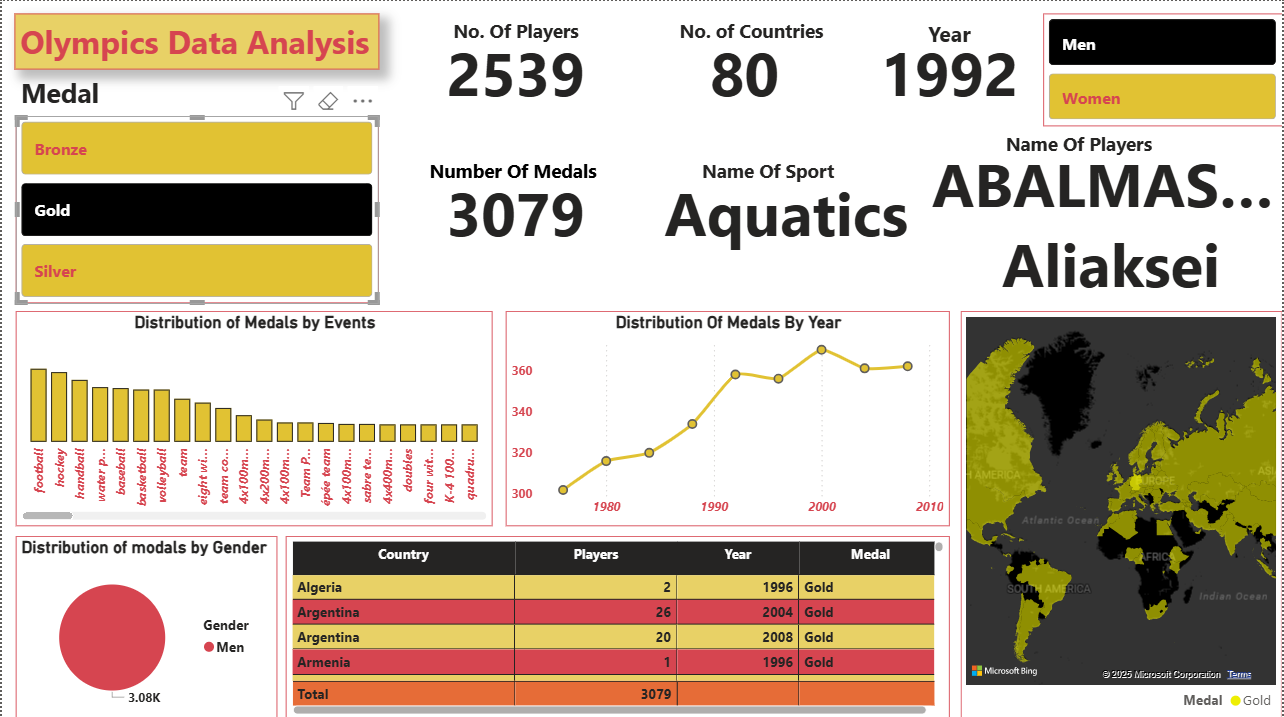

# Predictive Analysis:

In [35]:
copy_df=df.copy()

In [36]:
df.head()

,City,Year,Sport,Discipline,Event,Gender,Country,Medal,Players
0,Montreal,1976,Aquatics,Diving,3m springboard,Women,East Germany,Silver,"KÖHLER, Christa"
1,Montreal,1976,Aquatics,Diving,3m springboard,Men,Soviet Union,Bronze,"KOSENKOV, Aleksandr"
2,Montreal,1976,Aquatics,Diving,3m springboard,Men,United States,Gold,"BOGGS, Philip George"
3,Montreal,1976,Aquatics,Diving,3m springboard,Men,Italy,Silver,"CAGNOTTO, Giorgio Franco"
4,Montreal,1976,Aquatics,Diving,10m platform,Women,United States,Bronze,"WILSON, Deborah Keplar"


In [37]:
df.drop(columns='Players',inplace=True)

# Feature Engineering:

Feature transformation:

In [38]:
df.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Gender', 'Country',
       'Medal'],
      dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [40]:
for col in ['Gender','Medal']:
  df[col]=le.fit_transform(df[col])

In [41]:
df.head()

,City,Year,Sport,Discipline,Event,Gender,Country,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,1,East Germany,2
1,Montreal,1976,Aquatics,Diving,3m springboard,0,Soviet Union,0
2,Montreal,1976,Aquatics,Diving,3m springboard,0,United States,1
3,Montreal,1976,Aquatics,Diving,3m springboard,0,Italy,2
4,Montreal,1976,Aquatics,Diving,10m platform,1,United States,0


In [42]:
target_cols=['City', 'Sport', 'Discipline', 'Event', 'Country']

In [43]:
# Target Encoding:
for i in target_cols:
  dictionary=df.groupby(i)['Medal'].mean().to_dict()
  df[i]=df[i].map(dictionary)

In [44]:
df.head()

,City,Year,Sport,Discipline,Event,Gender,Country,Medal
0,0.986207,1976,1.008597,1.0,1.0,1,1.063898,2
1,0.986207,1976,1.008597,1.0,1.0,0,0.988247,0
2,0.986207,1976,1.008597,1.0,1.0,0,1.051205,1
3,0.986207,1976,1.008597,1.0,1.0,0,0.969136,2
4,0.986207,1976,1.008597,1.0,1.0,1,1.051205,0


 Feature Selection:

In [45]:
x=df.drop(columns=['Year','Medal'])

In [46]:
x.head()

,City,Sport,Discipline,Event,Gender,Country
0,0.986207,1.008597,1.0,1.0,1,1.063898
1,0.986207,1.008597,1.0,1.0,0,0.988247
2,0.986207,1.008597,1.0,1.0,0,1.051205
3,0.986207,1.008597,1.0,1.0,0,0.969136
4,0.986207,1.008597,1.0,1.0,1,1.051205


In [47]:
y=df['Medal']

In [48]:
x.describe()

,City,Sport,Discipline,Event,Gender,Country
count,15315.000000,15315.000000,15315.000000,15315.000000,15315.000000,15315.000000
mean,0.984198,0.984198,0.984198,0.984198,0.387071,0.984198
std,0.005886,0.057601,0.057692,0.061041,0.487096,0.153846
min,0.973607,0.750000,0.750000,0.750000,0.000000,0.000000
25%,0.980595,0.997549,0.997010,0.997821,0.000000,0.933619
50%,0.986207,1.000000,1.000000,1.000000,0.000000,0.988247
75%,0.990490,1.003215,1.002198,1.000000,1.000000,1.051205
max,0.991067,1.008597,1.013361,1.103093,1.000000,2.000000


Cross Validation:

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=32)

In [50]:
x_train

,City,Sport,Discipline,Event,Gender,Country
15066,0.976983,1.000000,1.000000,1.000000,1,0.946708
11163,0.991067,0.950000,0.950000,0.927273,0,1.086892
1406,0.986207,0.968105,0.976190,1.000000,0,0.988247
14229,0.976983,1.000000,1.000000,1.000000,0,0.933619
11109,0.991067,1.000000,1.000000,1.000000,1,1.051205
...,...,...,...,...,...,...
4148,0.983550,0.998561,0.998454,0.998454,1,1.086892
11250,0.991067,0.998561,0.998454,0.998454,0,0.969136
9644,0.991067,1.008597,1.002198,1.002198,0,0.946708
9889,0.991067,1.003283,1.003283,1.008299,1,0.955056


In [51]:
x_test

,City,Sport,Discipline,Event,Gender,Country
7308,0.973607,1.000000,1.000000,1.000000,0,0.995516
3840,0.983550,0.750000,0.750000,0.750000,0,0.819588
8609,0.987090,0.991060,0.989583,1.000000,1,0.931535
4462,0.980595,1.008597,1.002198,1.002198,0,1.051205
9008,0.987090,1.000000,1.000000,1.000000,1,1.086892
...,...,...,...,...,...,...
1066,0.986207,1.000000,1.000000,1.000000,0,1.026087
3574,0.983550,0.991060,0.989583,1.003040,0,0.819588
13921,0.976983,1.003283,1.003283,1.000000,0,1.051205
11462,0.990490,1.008597,1.013361,0.981818,0,1.051205


In [52]:
y_train

,Medal
15066,2
11163,0
1406,2
14229,2
11109,1
...,...
4148,1
11250,0
9644,2
9889,2


In [53]:
y_test

,Medal
7308,1
3840,1
8609,0
4462,2
9008,2
...,...
1066,0
3574,0
13921,2
11462,1


Model training & testing:

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
models={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier()
}

In [56]:
for model,classifier in models.items():
  classifier.fit(x_train,y_train)
  score=classifier.score(x_test,y_test)
  print(f"Score for {model} classifier is:",score)

Score for Logistic Regression classifier is: 0.38850799869409075
Score for Decision Tree classifier is: 0.6787463271302644
Score for Random Forest classifier is: 0.6758080313418218


# Final Model Selection:

In [57]:
model=DecisionTreeClassifier()

In [58]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
model.score(x_test,y_test)

0.6803787136793993

## Import GridSearchCV

### Subtask:
Import the `GridSearchCV` class from `sklearn.model_selection`.


**Reasoning**:
The subtask requires importing `GridSearchCV` from `sklearn.model_selection` to perform hyperparameter tuning. This will be done in a code block.



In [61]:
from sklearn.model_selection import GridSearchCV

In [64]:
model_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,7,10,12,14,15],
    'min_samples_split': [2, 5, 7,10]
}

In [65]:
grid_search = GridSearchCV(estimator=model, param_grid=model_param, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2}
Best score found:  0.6305909239307868


For Default training we are getting best score: 68%

# Answering of Questions:

 1. Analyze the dataset to understand trends in medal distribution.
 2. Identify the top-performing countries and athletes.
 3. Study the gender distribution of events and medals.
 4. Visualize the data using Python.

In [66]:
# Total 4024 players got gold medal( 2539 male,1486 female).
# Highest number of gold in the event of handball for women and football for men.
# In the Game football mens perform well and come from countries such as: South America, Europe and Africa.
# Top perorming countries: Austrelia,UK,Africa,India.
# In the year of 1992 the number of gold medals were highest(252).